# CRISP DM

# Bussines Understanding

Masalah pada kasus ini adalah tentang informasi yang diperlukan untuk memprediksi apakah pasien terkena penyakit paru-paru atau tidak. Penyakit paru-paru dapat memiliki berbagai penyebab dan jenis, seperti infeksi saluran pernapasan atas, bronkitis, pneumonia, asma, penyakit paru obstruktif kronik (PPOK), atau kondisi serius lainnya seperti kanker paru-paru. Jika seseorang terkena penyakit paru-paru dan tidak diobati, dapat timbul dampak yang serius pada kesehatan dan kualitas hidupnya. contohnya, seperti sesak nafas, asma akut, sering kelelahan yang berlebihan, tidak menghirup udara dengan baik.

Dataset :( https://www.kaggle.com/datasets/andot03bsrc/dataset-predic-terkena-penyakit-paruparu )

# DATA UNDERSTANDING

Dari pengumpulan data yang telah diambil mengenai virus HIV yang di derita oleh pasien, terdapat 11 kolom yang berisi 1 kolom int64 dan 10 kolom object. Jika menggunakan algoritma decision tree, maka hanya kolom yang berisi float64 atau int64 saja yang bisa diolah. Karena ini menggunakan algoritma decision tree. Berikut atribut-atribut nya :

1. Usia 

2. Jenis Kelamin
    - value 1 : Pria
    - value 2 : Pria
    - value 3 : Wanita
    - value 4 : Wanita
3. Merokok = Pasien yang Merokok
    - value 1 : Pasif
    - value 2 : Aktif
    - value 3 : Aktif
4. Bekerja = Pasien yang Bekerja
    - value 1 : Tidak
    - value 2 : Tidak
    - value 3 : Tidak
    - value 4 : Ya
5. Rumah Tangga = Pasien yang sudah Menikah
    - value 1 : Ya
    - value 2 : Ya
    - value 3 : Ya
    - value 4 : Tidak
6. Aktivitas Begadang = Pasien yang melakukan aktivitas Begadang
    - value 1 : Ya
    - value 2 : Ya
    - value 3 : Ya
    - value 4 : Tidak
7. Aktivitas Olahraga = Pasien yang melakukan aktivitas Olahraga
    - value 1 : Sering
    - value 2 : Jarang
    - value 3 : Jarang
    - value 4 : Jarang
8. Asuransi
    - value 1 : Ada
    - value 2 : Ada
    - value 3 : Ada
    - value 4 : Ada
    - value 5 : Tidak
9. Penyakit Bawaan
    - value 1 : Tidak
    - value 2 : Ada
    - value 3 : Tidak
    - value 4 : Ada
10. Hasil
    - value 1 : Ya
    - value 2 : Tidak


In [1]:
import pandas as pd
import numpy as np


# Load DATASET

In [2]:
df = pd.read_csv('penyakit_paru-paru.csv')
df.sample()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
4590,4591,Muda,Wanita,Pasif,Ya,Tidak,Ya,Sering,Tidak,Ada,Ya


In [3]:
df.head(10)

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya
5,6,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak
6,7,Tua,Wanita,Pasif,Tidak,Ya,Tidak,Sering,Tidak,Tidak,Ya
7,8,Muda,Pria,Aktif,Tidak,Ya,Ya,Sering,Tidak,Tidak,Tidak
8,9,Tua,Wanita,Aktif,Ya,Ya,Ya,Jarang,Ada,Ada,Ya
9,10,Muda,Wanita,Pasif,Ya,Tidak,Ya,Jarang,Ada,Ada,Ya


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  30000 non-null  int64 
 1   Usia                30000 non-null  object
 2   Jenis_Kelamin       30000 non-null  object
 3   Merokok             30000 non-null  object
 4   Bekerja             30000 non-null  object
 5   Rumah_Tangga        30000 non-null  object
 6   Aktivitas_Begadang  30000 non-null  object
 7   Aktivitas_Olahraga  30000 non-null  object
 8   Asuransi            30000 non-null  object
 9   Penyakit_Bawaan     30000 non-null  object
 10  Hasil               30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [5]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True) 

In [6]:
numerical

['No']

In [7]:
catgcols

['Usia',
 'Jenis_Kelamin',
 'Merokok',
 'Bekerja',
 'Rumah_Tangga',
 'Aktivitas_Begadang',
 'Aktivitas_Olahraga',
 'Asuransi',
 'Penyakit_Bawaan',
 'Hasil']

In [8]:
ind_col = [col for col in df.columns if col != 'Hasil']
dep_col = 'Hasil'

In [9]:
df['Hasil'].value_counts()

Hasil
Tidak    15648
Ya       14352
Name: count, dtype: int64

# Transformasi Dataset

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catgcols:
    df[col] =le.fit_transform(df[col])

In [11]:
df['Hasil'] = le.fit_transform(df['Hasil'])

In [12]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [13]:
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,1,0,1,0,1,1,1,0,1,1
1,2,1,0,0,0,1,1,0,0,0,0
2,3,0,0,0,0,1,1,0,0,1,0
3,4,1,0,0,1,0,0,0,0,0,0
4,5,0,1,1,1,0,0,1,1,0,1


In [14]:
df.to_csv('penyakit-paru-paru.csv')

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Membuat model decision tree

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9471666666666667
akurasi data testing = 0.9443333333333334 

confusion matrix : 
[[3180    0]
 [ 334 2486]]

classification report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3180
           1       1.00      0.88      0.94      2820

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



# Simulasi Model

In [17]:
input_data = (1,0,1,0,1,1,1,0,1,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print ('Pasien terkena Penyakit Paru-Paru')
else:
    print ('Pasien tidak terkena Penyakit Paru-Paru')

[1]
Pasien terkena Penyakit Paru-Paru


C:\Users\Elman S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi pohon keputusan

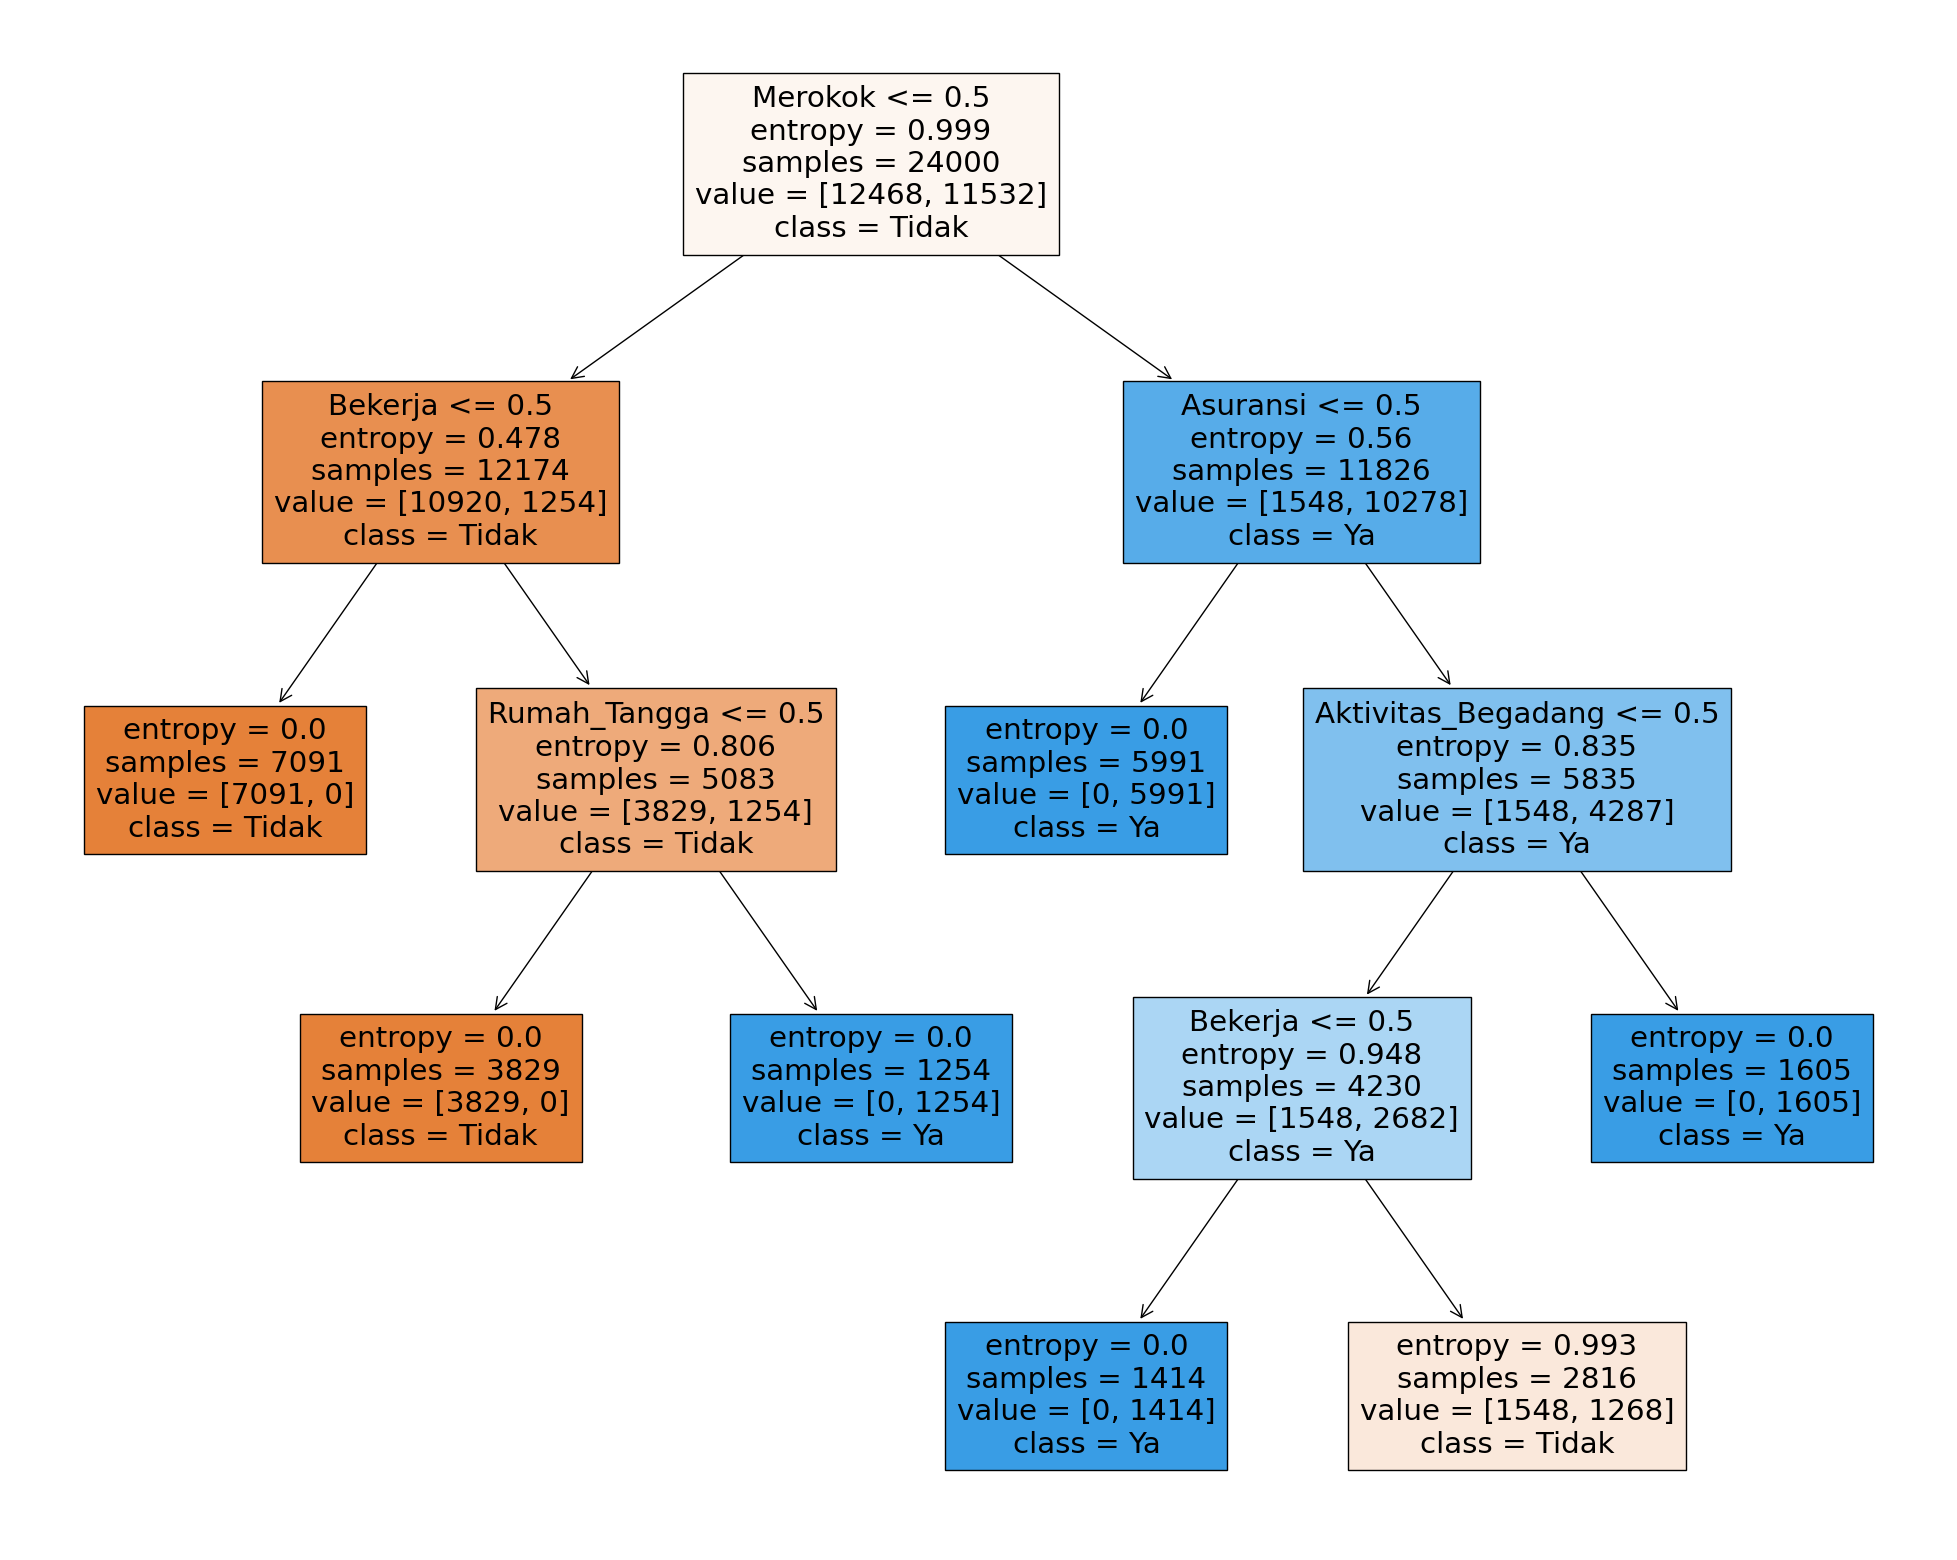

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['Tidak','Ya'],
                   filled=True
                   )

# Save Model

In [19]:
import pickle

filename = 'paru-paru.sav'
pickle.dump(model, open(filename, 'wb'))